<a href="https://colab.research.google.com/github/avantgarde-cy/Netflix_Analysis/blob/master/sh_data_preprocessing_and_visualization(3)_0715.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0715

- 장르별 콘텐츠 수 (movie, tv series) 시각화 추가
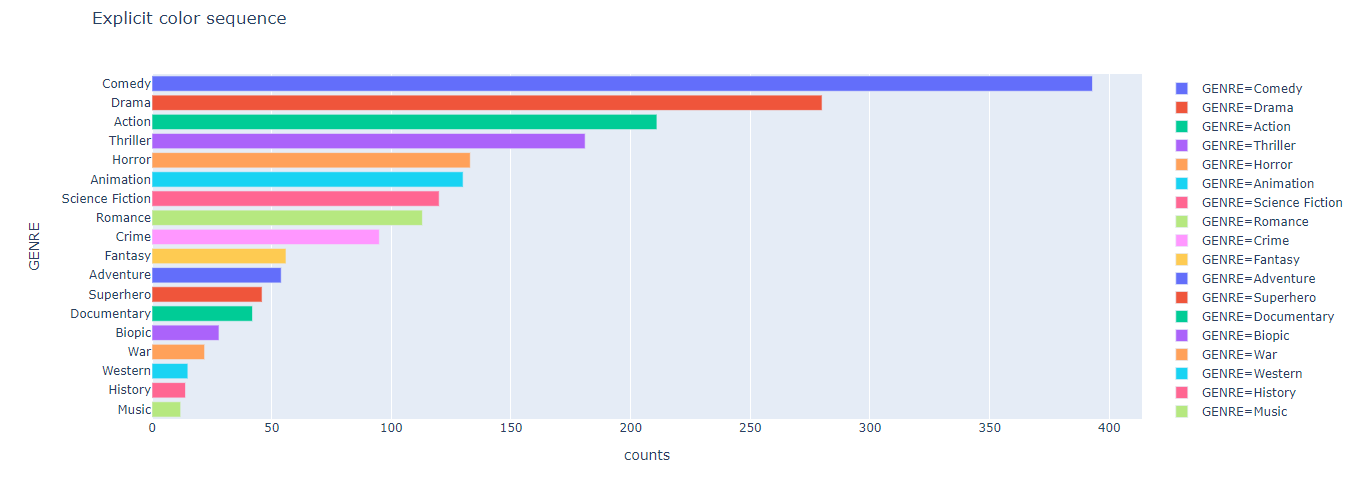
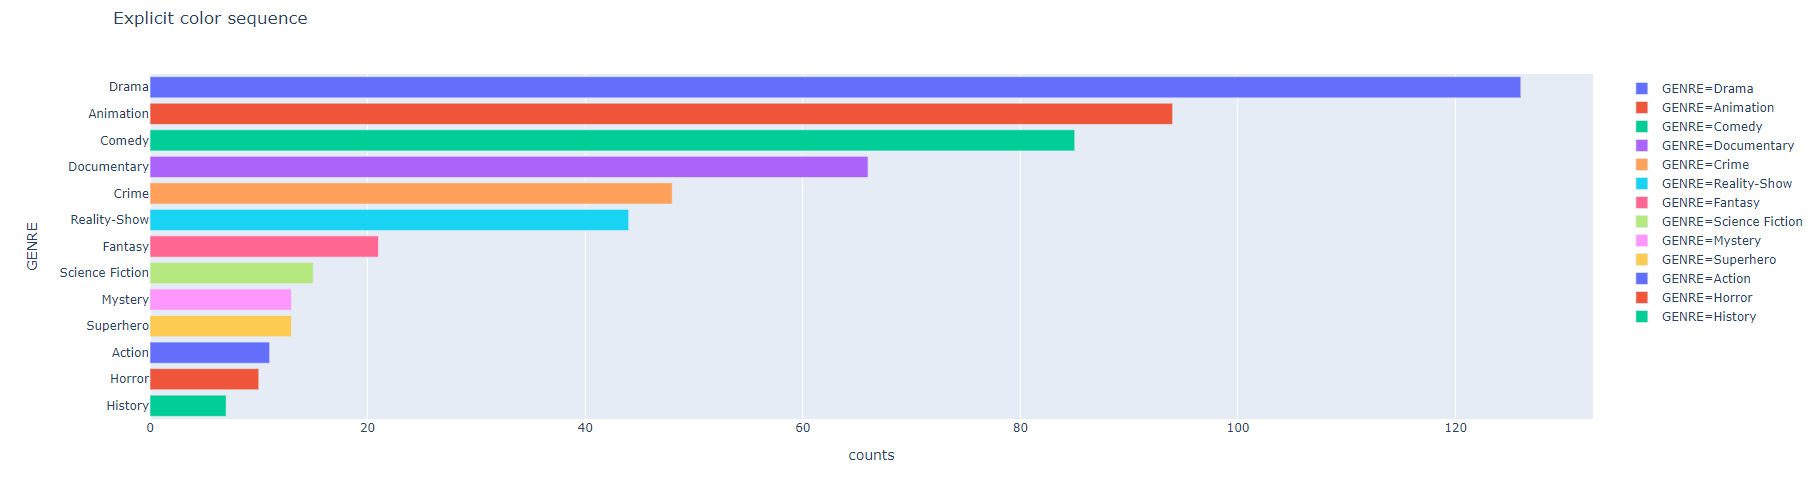

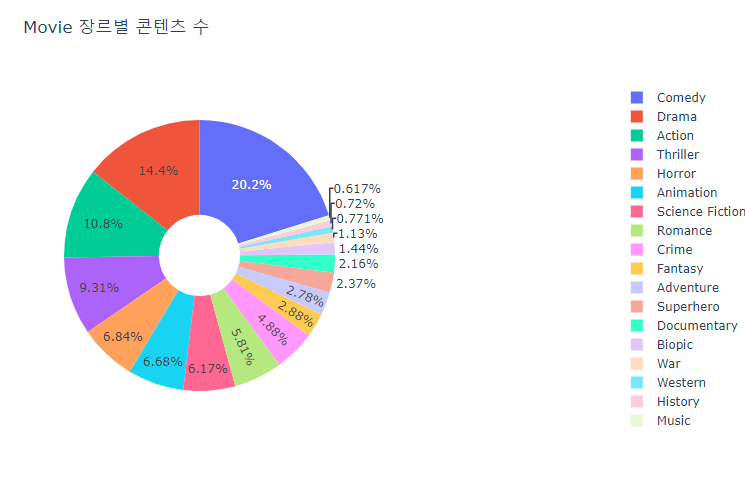

- Talk Show, Fairy Tale, Concerts 장르 드랍 

-----
결과 요약 

- 코드 2번 항목 #평점과 viewpoints 분석

  - TV shows 와 Movie 상관없이  Value와 IMDb Score은 **관계가 없다** (이 둘의 상관 관계가 0에 가깝기 때문에)

  - 평점대별 viewpoint 분포 시각화
  
  :: 평점이 3점대지만 viewpoints가 가장 높았던 영화는 365days( Netflix Original | Romance, Drama | 18+)
  
  :: TV시리즈 중 viewpoints가 가장 높은 것은 평점 7점대인 The Queen's Gambit (Netflix Original | Drama | 18+)  
  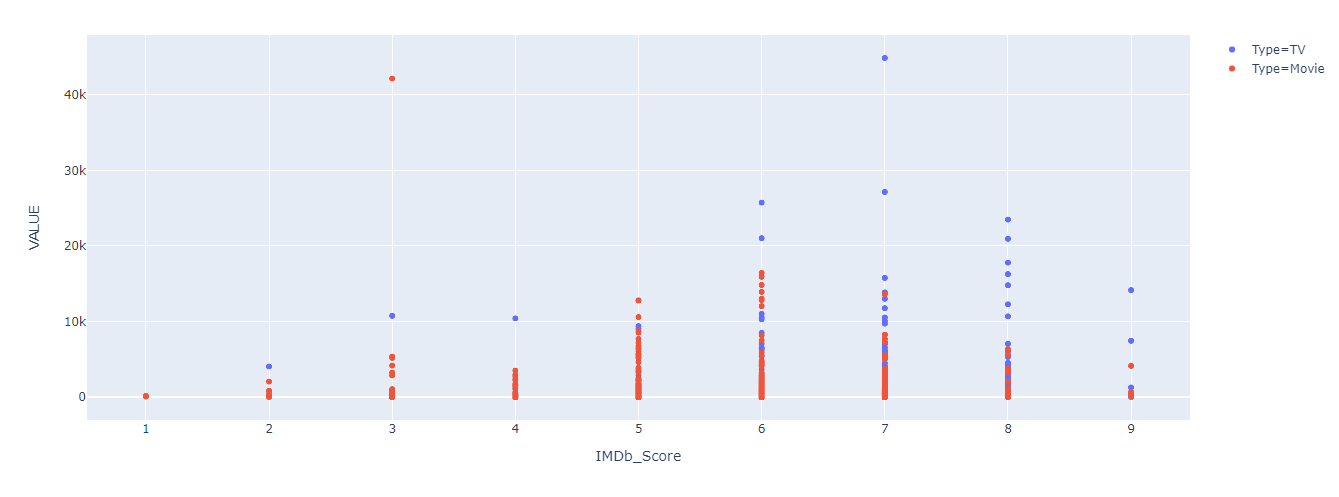



- 코드 3번 항목 #장르별 viewpoints 분석

  - 장르별로 Viewpoints를 살펴보았으나 유의미한 차이가 없었고, TV 시리즈와 달리 영화의 경우 로맨스, 드라마, 액션, 뮤직 부분 에서 눈에 띄는 **흥행작(Outlier)이 존재함을 발견**

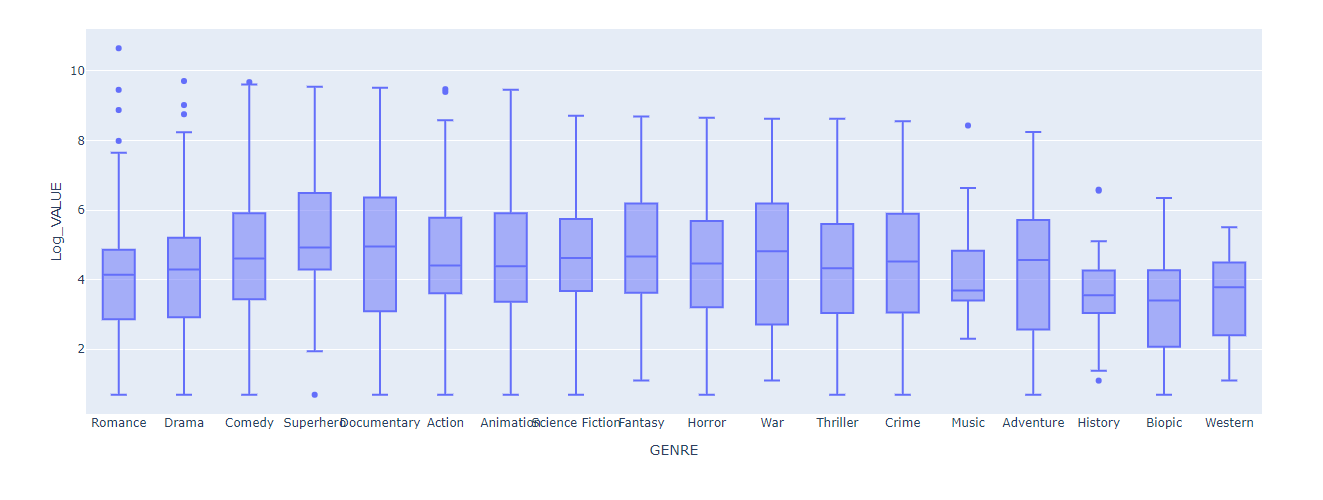

  - **로맨스 부분 outlier** : 
    1. 365days( Netflix Original | Romance, Drama | 18+) 
    2.the kissing booth2 ( Netflix Original | Romance, Comedy | 15+) 
    3. The Princess Switch: Switched Again ( Comedy,  Family | All )
    4. fifty shades freed ( Thriller, Romance | 18+)
  - **드라마 부분 outlier** :
      1. Enola holmes ( Netflix Original | Action, Adventure | 12+)
      2. The Devil All the Time ( Crime Drama |18+)
      3. Rebecca ( Mystery, Romance | 15+)

## 1. 데이터 불러오기 

In [ ]:
import pandas as pd
import numpy as np

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
use_df = pd.read_csv('use_df.csv', encoding = 'unicode_escape')

## 2.VALUE & IMDb Score 분석 

In [ ]:
use_df.info()

In [ ]:
use_df.head(2)

**헤더 이름 정리**
- Series or Moive 를 Type으로 변환
- 스페이스 없게 변환

In [ ]:
use_df = use_df.rename(columns={"IMDb Score":'IMDb_Score', "IMDb Votes":"IMDb_Votes", "Series or Movie":'Type'})
use_df.head(2)

#### **해당 데이터에서 쓰고자 하는 컬럼 외에 다른 것들 드랍**
VALUE와 IMDb_Score, GENRE만 사용

In [ ]:
IMDB_base = use_df.drop(['Unnamed: 0','IMDb_Votes','COUNTRY','Tags','Country Availability','Languages','Hidden Gem Score', 'Runtime', 'Director', 'Writer', 'Actors','Metacritic Score','Awards Received','Awards Nominated For','Release Date','Production House','Runtime','Summary','View Rating','Rotten Tomatoes Score','Boxoffice','Netflix Release Date','Genre_all'], axis = 1)
IMDB_base

**결측치 있는 항목 드랍**

In [ ]:
sns.heatmap(IMDB_base.isnull())

In [ ]:
IMDB_base = IMDB_base.dropna(subset=['IMDb_Score'])
IMDB_base

#### **형 변환**

점수대 별 VALUE(Viewpoints)를 확인하기 위해 IMDb_Score 형변환한 데이터 별도 생성 (int_score)

In [ ]:
int_score = IMDB_base.copy()
int_score

In [ ]:
int_score['IMDb_Score'] = int_score['IMDb_Score'].astype('int')
int_score

In [ ]:
IMDB_base.dtypes

#### **결측치 확인 및 제거**

In [ ]:
sns.heatmap(IMDB_base.isnull())

In [ ]:
len(IMDB_base['VALUE'].unique())

In [ ]:
IMDB_base['VALUE'].value_counts()

#### **데이터 분포 확인**

IMDB SCORE - 평점은 5~7점대가 대부분

In [ ]:
sns.boxplot(x=IMDB_base['IMDb_Score'])

Viewpoints - **편향됨**

In [ ]:
sns.boxplot(x=IMDB_base['VALUE'])

평점 별 Viewpoint(VALUE)값 확인

In [ ]:
IMDB_base.plot.scatter(x="IMDb_Score",y="VALUE",s=20);

평점대 별 Viewpoint(VALUE)값 확인

In [ ]:
int_score.plot.scatter(x="IMDb_Score", y="VALUE", s =20); 

#### **데이터 스케일링**

**로그 스케일링하여 편향된 데이터를 변환** :: VALUE -> Log_VALUE

In [ ]:
IMDB_base["Log_VALUE"] = np.log1p(IMDB_base["VALUE"])
f, ax = plt.subplots(figsize = (10, 6))
sns.distplot(IMDB_base["Log_VALUE"])
print("Skewness: {:.3f}".format(IMDB_base["Log_VALUE"].skew()))
print("Kurtosis: {:.3f}".format(IMDB_base["Log_VALUE"].kurt()))

In [ ]:
IMDB_base

In [ ]:
IMDB_log = IMDB_base.drop(['VALUE'], axis = 1)

In [ ]:
IMDB_log = IMDB_log.round(decimals=3)

**int_score : 평점대별 Log VALUE**

In [ ]:
int_score["Log_VALUE"] = np.log1p(int_score["VALUE"])
f, ax = plt.subplots(figsize = (10, 6))
sns.distplot(int_score["Log_VALUE"])
print("Skewness: {:.3f}".format(int_score["Log_VALUE"].skew()))
print("Kurtosis: {:.3f}".format(int_score["Log_VALUE"].kurt()))

In [ ]:
int_score

**Log_VALUE 값이 0.5 보다 작을 경우 해당 콘텐츠 드랍**

In [ ]:
IMDB_log = IMDB_log.loc[(IMDB_log.Log_VALUE >= 0.5 )]
IMDB_log

#### **Movie_base**

**Type 중에서 Movie만 남기기**

In [ ]:
movie_base = IMDB_log.loc[(IMDB_log.Type == 'Movie')]
movie_base

**Movie_base의 데이터 분포 확인**

In [ ]:
sns.pairplot(data = movie_base)

In [ ]:
sns.jointplot(x="IMDb_Score", y="Log_VALUE", data=movie_base, kind="scatter");

#### **Movie 데이터에서 IMDb 와 VALUE(points)와 상관관계**

In [ ]:
movie_corr = movie_base.corr()
movie_corr

In [ ]:
sns.heatmap(movie_corr, annot=True)

#### **tv_base**

**Type 중에서 TV만 남기기** 

In [ ]:
tv_base = IMDB_log.loc[(IMDB_log.Type == 'TV')]
tv_base

**tv_base의 데이터 분포 확인**

In [ ]:
sns.pairplot(data = tv_base)

In [ ]:
sns.jointplot(x="IMDb_Score", y="Log_VALUE", data=tv_base, kind="scatter");

#### **TV shows 중 IMDb 와 VALUE(points)와 상관관계** 

In [ ]:
tv_corr = tv_base.corr()
tv_corr

In [ ]:
sns.heatmap(tv_corr, annot=True)

## 2.결과 ***TV shows 와 Movie 상관없이  Value와 IMDb Score은 관계가 없다***

+ 추가 사항 :: TV shows와 Moive가 합쳐져 있는 IMDB_log 데이터로 보아도 역시 관계가 없다

In [ ]:
IMDB_log_corr = IMDB_log.corr()
IMDB_log_corr

In [ ]:
sns.heatmap(IMDB_log_corr, annot=True)

**| 평점대별 VALUE(Viewpoint)분포**

In [ ]:
fig = px.scatter(int_score, x='IMDb_Score', y='VALUE', color='Type', hover_data=['Title'])
fig.show()

In [ ]:
fig = px.scatter(int_score, x='IMDb_Score', y='VALUE', hover_data=['Title'])
fig.show()

## 3.Genre 와 IMDb 살펴보기

In [ ]:
sns.heatmap(IMDB_log.isnull())

In [ ]:
IMDB_log = IMDB_log.dropna(subset=['GENRE']) #장르가 없을 경우 드랍

In [ ]:
IMDB_log = IMDB_log.replace('Animated', 'Animation') #animated와 animation 합치기

In [ ]:
IMDB_log

#### Moive

**영화만 불러오기**

In [ ]:
movie_base = IMDB_log.loc[(IMDB_log.Type == 'Movie')]
movie_base

In [ ]:
movie_base.info()

In [ ]:
movie_base

**콘텐츠 수가 적은 장르 드랍**

In [ ]:
drop = movie_base['GENRE'].isin(['Concerts','Fairy Tale'])
movie_base[~drop].head()

In [ ]:
movie_base = movie_base[~drop]

**장르별 그룹핑**

In [ ]:
movie_genre = movie_base.groupby("GENRE")
movie_genre.first()

In [ ]:
m_counts = movie_base.groupby("GENRE").size()
m_counts

In [ ]:
dfm_counts = pd.DataFrame({'GENRE':m_counts.index, 'counts':m_counts.values}) #Series를 Dataframe으로 변환
dfm_counts

시각화 | **콘텐츠가 많은 장르 수** - 영화 부분

In [ ]:
dfm_counts = dfm_counts.sort_values(by='counts', ascending=False)

In [ ]:
fig = px.bar(dfm_counts, y="GENRE", x="counts", color="GENRE", orientation="h",
             title="Explicit color sequence"
            )
fig.show()

In [ ]:
pie1 = dfm_counts.counts
labels = dfm_counts.GENRE

fig = {
  "data": [
    {
      "values": dfm_counts.counts,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "counts",
      "hoverinfo": "label+value",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Movie 장르별 콘텐츠 수",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
               "text": "",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)

### **MOVIE 장르별 시각화**

시각화 | **MOVIE 장르별 Log_Value 분포**

In [ ]:
fig = px.box(movie_base, x="GENRE", y="Log_VALUE", hover_name='Title')
fig.show()

시각화 **| 장르별 IMDB 점수 분포**

In [ ]:
fig = px.box(movie_base, x="GENRE", y="IMDb_Score", hover_name='Title')
fig.show()

### TV

**TV Series만 불러오기**

In [ ]:
tv_base = IMDB_log.loc[(IMDB_log.Type == 'TV')]
tv_base

In [ ]:
tv_base = tv_base.replace('Animated', 'Animation')

**콘텐츠 수가 적은 Talk Show 드랍**

In [ ]:
drop = tv_base['GENRE'].isin(['Talk Show'])
tv_base[~drop].head()

In [ ]:
tv_base = tv_base[~drop]

**장르별 그룹핑**

In [ ]:
tv_genre = tv_base.groupby("GENRE")
tv_genre.first()

**장르별 콘텐츠 수 카운팅**

In [ ]:
tv_counts = tv_base.groupby("GENRE").size()
tv_counts

In [ ]:
dftv_counts = pd.DataFrame({'GENRE':tv_counts.index, 'counts':tv_counts.values}) #Series를 Dataframe으로 변환
dftv_counts

시각화 | **콘텐츠가 많은 장르 수** -- TV Series

In [ ]:
dftv_counts = dftv_counts.sort_values(by='counts', ascending=False)

In [ ]:
fig = px.bar(dftv_counts, y="GENRE", x="counts", color="GENRE", orientation="h",
             title="Explicit color sequence"
            )
fig.show()

In [ ]:
pie1 = dftv_counts.counts
labels = dftv_counts.GENRE

fig = {
  "data": [
    {
      "values": dftv_counts.counts,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "counts",
      "hoverinfo": "label+value",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"TV Series 장르별 콘텐츠 수",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
               "text": "",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)

시각화 | **TV 장르별 Log_Value 분포**

In [ ]:
fig = px.box(tv_base, x="GENRE", y="Log_VALUE", hover_name='Title')
fig.show()

| **TV 장르별 IMDB 분포**

In [ ]:
fig = px.box(tv_base, x="GENRE", y="IMDb_Score", hover_name='Title')
fig.show()

## 3.결과 :  장르별로 Viewpoints를 살펴보았으나 **유의미한 차이가 없었고,** TV 시리즈와 달리 **영화의 경우 로맨스, 드라마, 액션, 뮤직 부분 에서 눈에 띄는 흥행작(Outlier)이 존재함을 발견**

## 4. 추가 사항

장르 별로 세분화하여 보아도 value(viewpoint)와 Score 값은 유의미한 상관관계가 있다고 볼 수 없다

In [ ]:
corr = movie_genre[['IMDb_Score','Log_VALUE']].corr()
corr.style.background_gradient(cmap='PuBu').set_precision(2)

In [ ]:
corr = tv_genre[['IMDb_Score','Log_VALUE']].corr()
corr.style.background_gradient(cmap='PuBu').set_precision(2)

In [ ]:
tv_genre.corr()

#### 추가로 순위권에 있는 영화를 살펴보는 방향성도 있어 데이터를 추출함

In [ ]:
top_Score = movie_base.sort_values(by='IMDb_Score', ascending=False) #데이터 확인
top_Score.iloc[:101]

In [ ]:
top_points = movie_base.sort_values(by='Log_VALUE', ascending=False) #데이터 확인
top100_points = top_points.iloc[:101]
top100_points

top 100 안에서 장르별 수 

In [ ]:
top100_counts = top100_points.groupby("GENRE").size()
top100_counts

In [ ]:
top100_counts = pd.DataFrame({'GENRE':top100_counts.index, 'counts':top100_counts.values}) #Series를 Dataframe으로 변환
top100_counts

In [ ]:
top100_counts.set_index('GENRE','counts')